#Import packages

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#Load dataset

In [ ]:
#Read data csv into dataframe
df_diab = pd.read_csv("diabetes_data.csv")

#Print some entries to have a look
df_diab.head()

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP,Diabetes
0,4.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,0.0,1.0,0.0,3.0,5.0,30.0,0.0,0.0,1.0,0.0
1,12.0,1.0,1.0,1.0,26.0,1.0,0.0,0.0,1.0,0.0,0.0,3.0,0.0,0.0,0.0,1.0,1.0,0.0
2,13.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,10.0,0.0,0.0,0.0,0.0
3,11.0,1.0,1.0,1.0,28.0,1.0,0.0,1.0,1.0,1.0,0.0,3.0,0.0,3.0,0.0,0.0,1.0,0.0
4,8.0,0.0,0.0,1.0,29.0,1.0,0.0,1.0,1.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0


#Missing entries

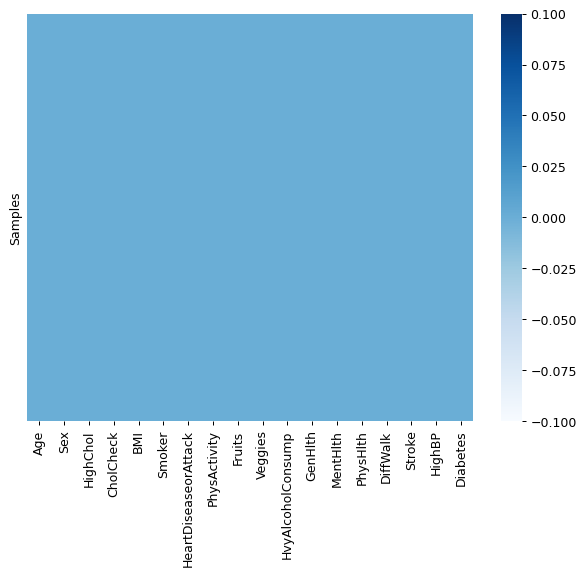

In [ ]:
#Get null values
null_values = df_diab.isnull()

#Use seaborn to plot null_values using heatmap
plt.figure(figsize=(8,6), dpi=90)
sns.heatmap(null_values, yticklabels=False, cmap="Blues");
plt.ylabel("Samples");

In [ ]:
df_diab.columns

Index(['Age', 'Sex', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk',
       'Stroke', 'HighBP', 'Diabetes'],
      dtype='object')

#Statistical details

In [ ]:
#Print some statistical details of the features
df_diab.describe()

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP,Diabetes
count,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000
mean,8.584055,0.456997,0.525703,0.975259,29.856985,0.475273,0.147810,0.703036,0.611795,0.788774,0.042721,2.837082,3.752037,5.810417,0.252730,0.062171,0.563458,0.500000
std,2.852153,0.498151,0.499342,0.155336,7.113954,0.499392,0.354914,0.456924,0.487345,0.408181,0.202228,1.113565,8.155627,10.062261,0.434581,0.241468,0.495960,0.500004
min,1.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000000,0.000000,0.000000,1.000000,25.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,9.000000,0.000000,1.000000,1.000000,29.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.500000
75%,11.000000,1.000000,1.000000,1.000000,33.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,4.000000,2.000000,6.000000,1.000000,0.000000,1.000000,1.000000
max,13.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,1.000000,1.000000


#Correlation between features

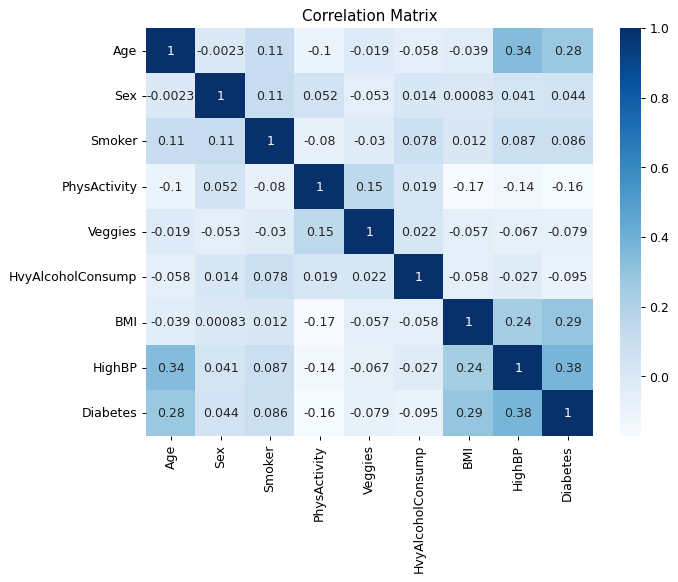

In [ ]:
#Select columns for correlation analysis
corr_columns = ["Age",
                "Sex",
                "Smoker",
                "PhysActivity",
                "Veggies",
                "HvyAlcoholConsump",
                "BMI",
                "HighBP",
                "Diabetes"]

#Calculate correlation between features
feat_corr = df_diab[corr_columns].corr()

#Plot correlation using heatmap
plt.figure(figsize=(8,6), dpi=90)
sns.heatmap(feat_corr, annot=True, cmap='Blues');
plt.title("Correlation Matrix");

#Class distribution

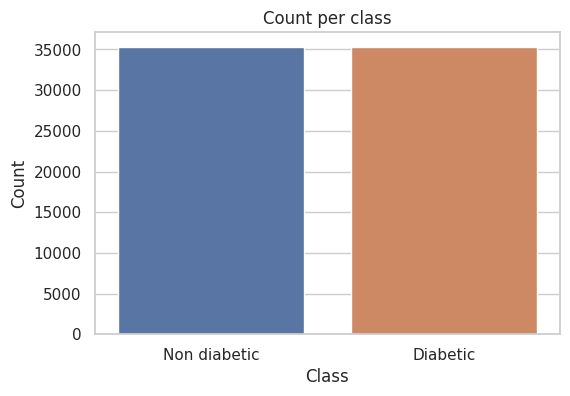

In [ ]:
#Total count in each class
classes_count = [sum(df_diab["Diabetes"]==0), sum(df_diab["Diabetes"]==1)]

#Plot using barchart
plt.figure(figsize=(6,4), dpi=100)
sns.set_theme(style="whitegrid");
sns.barplot(x = ["Non diabetic", "Diabetic"], y=classes_count);
plt.xlabel("Class")
plt.ylabel("Count")
plt.title("Count per class");

#Classwise age distribution 

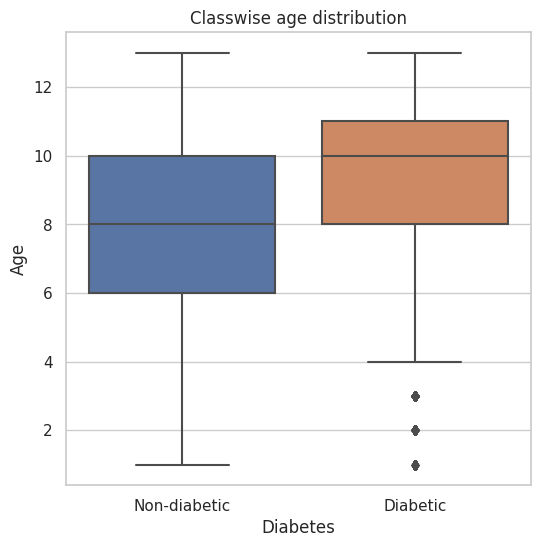

In [ ]:
#Class labels
classes = {0:"Non-diabetic", 1:"Diabetic"}

#Create classwise boxplots for age feature
plt.figure(figsize=(6,6), dpi=100)
sns.set_theme(style="whitegrid")
sns.boxplot(x=df_diab["Diabetes"].map(classes), y=df_diab["Age"]);
plt.title("Classwise age distribution");

#BMI distribution for each class

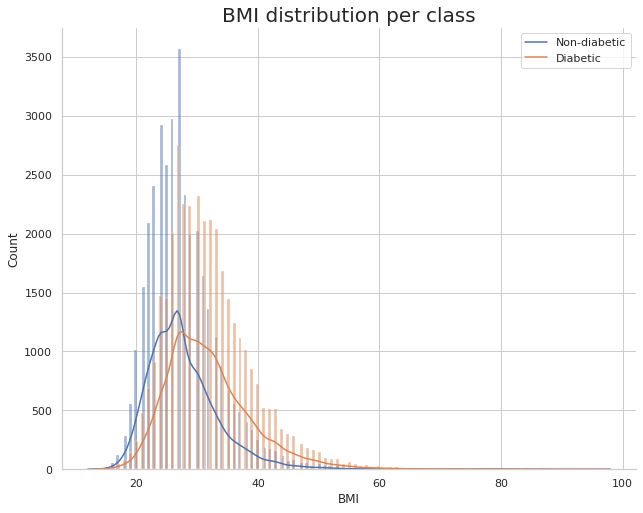

In [ ]:
#Create pdf plot of BMI for each class
sns.FacetGrid(df_diab, hue='Diabetes', height=7, aspect=1.3).map(sns.histplot, 'BMI', kde=True);
plt.legend(classes.values());
plt.title("BMI distribution per class",fontsize=20);

#Percent distribution of blood pressure per class 

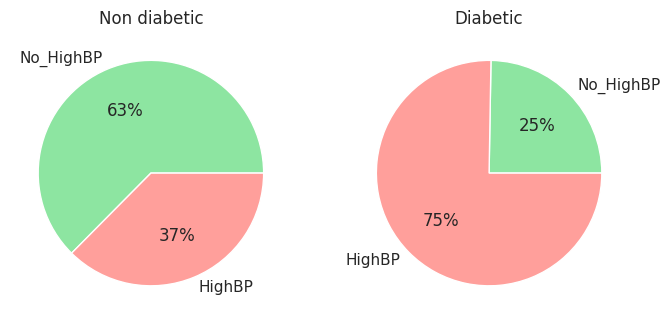

In [ ]:
#Get some seaborn colors. Palette could be changed for other colors
colors = sns.color_palette('pastel')[0:4]

#Get high blood pressure count for each class
non_diab_bp = [sum(df_diab[df_diab["Diabetes"]==0]["HighBP"]==0), sum(df_diab[df_diab["Diabetes"]==0]["HighBP"]==1)]
diab_bp = [sum(df_diab[df_diab["Diabetes"]==1]["HighBP"]==0), sum(df_diab[df_diab["Diabetes"]==1]["HighBP"]==1)]

#Create a pie chart using percent distribution of blood pressure for each class
plt.figure(figsize=(8,8), dpi=100)

#Non diabetic
plt.subplot(1,2,1)
plt.pie(non_diab_bp, labels=["No_HighBP", "HighBP"], colors=colors[2:4], autopct='%0.0f%%');
plt.title("Non diabetic")

#Diabetic
plt.subplot(1,2,2)
plt.pie(diab_bp, labels=["No_HighBP", "HighBP"], colors=colors[2:4], autopct='%0.0f%%');
plt.title("Diabetic");

#Diabetic count for each sex

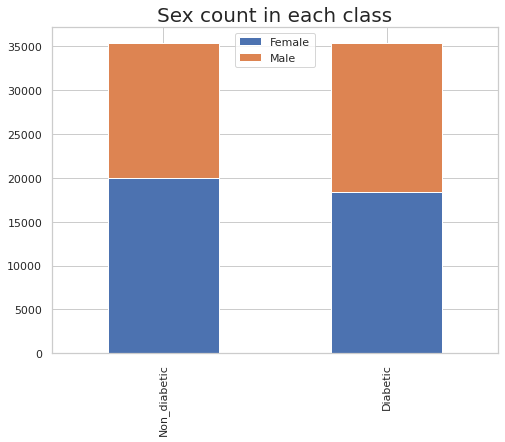

In [ ]:
#Calculate diabetic count for each sex
nondiabetic_sex_count = df_diab[df_diab["Diabetes"]==0]["Sex"].value_counts()
diabetic_sex_count    = df_diab[df_diab["Diabetes"]==1]["Sex"].value_counts()

#Create a dataframe for both counts
diab_cnt = pd.DataFrame([nondiabetic_sex_count, diabetic_sex_count])

#Label the count dataframe
diab_cnt.index = ["Non_diabetic", "Diabetic"]

#Plot the count dataframe using a stacked barchart
diab_cnt.plot(kind="bar", stacked=True, figsize=(8,6));

#label the plot
plt.legend(["Female", "Male"], loc='upper center');
plt.title("Sex count in each class", fontsize=20); 

#Smoker Age-Class distribution

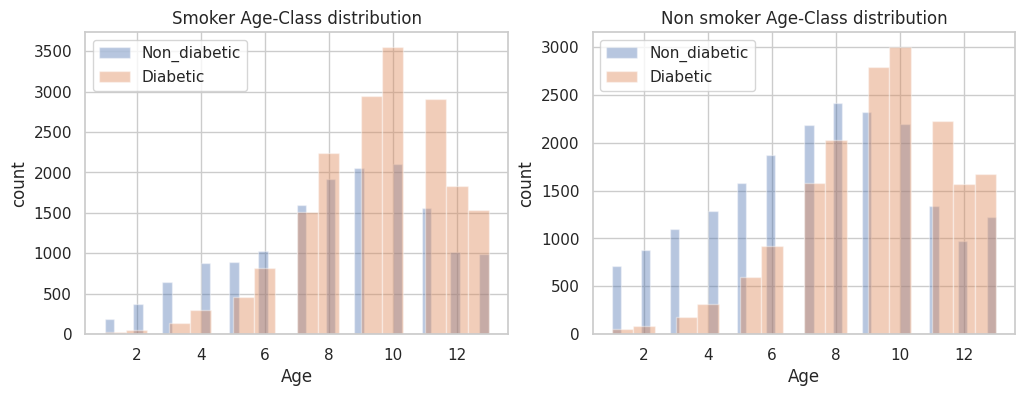

In [ ]:
#Count each sex
smoker = df_diab[df_diab["Smoker"]==1]
non_smoker = df_diab[df_diab["Smoker"]==0]

#Create subplots
figure, axs = plt.subplots(nrows=1, ncols=2, figsize=(12,4), dpi=100)
sns.set_theme(style="whitegrid");

#Plot female age distribution for each class
ax = sns.distplot(smoker[smoker["Diabetes"]==0].Age, bins=40, label="Non_diabetic", ax=axs[0], kde=False)
ax = sns.distplot(smoker[smoker["Diabetes"]==1].Age, bins=18, label="Diabetic", ax=axs[0], kde=False)
ax.legend(["Non_diabetic", "Diabetic"]);
ax.set_title("Smoker Age-Class distribution");
ax.set_ylabel("count");

#Plot male age distribution for each class
ax = sns.distplot(non_smoker[non_smoker["Diabetes"]==0].Age, bins=40, label="Non_diabetic", ax=axs[1], kde=False)
ax = sns.distplot(non_smoker[non_smoker["Diabetes"]==1].Age, bins=18, label="Diabetic", ax=axs[1], kde=False)
ax.legend(["Non_diabetic", "Diabetic"]);
ax.set_title("Non smoker Age-Class distribution");
ax.set_ylabel("count");